# Barabasi-Albert network model

## Model implementation

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ba_network(N, m) :
    m0 = m
    G = nx.complete_graph(m0)

    idx = np.array(range(N))
    ks = np.zeros(N)
    ks[:m0] = m0 - 1
    k_sum = m0 * (m0 - 1)    # Counter for current total degree

    for i in range(m0, N) :
        # Pick nodes to connect to
        ns = np.random.choice(idx, size=m, replace=False, p=ks/k_sum)

        G.add_edges_from(zip([i]*m, ns))

        ks[i] = m
        np.add.at(ks, ns, 1)
        k_sum = k_sum + 2*m
    
    return G

In [3]:
m = 3
N = 10**4

G = ba_network(N, m)

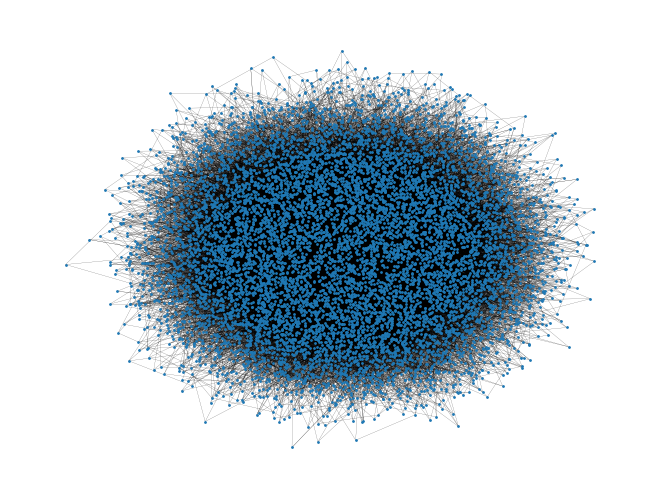

In [4]:
nx.draw(G, node_size=1, width=0.1)

In [5]:
print(f"Number of nodes: {G.number_of_nodes()}; original model: {N}")
print(f"Number of edges: {G.number_of_edges()}; original model: {(N-m) * m}") 

Number of nodes: 10000; original model: 10000
Number of edges: 29994; original model: 29991


The discrepancy in the number of edges is due to the initialization procedure. By starting with a fully-connected graph, an extra $\frac{m(m-1)}{2}$ edges are added:

In [6]:
m * (m-1) / 2

3.0

## Degree distribution

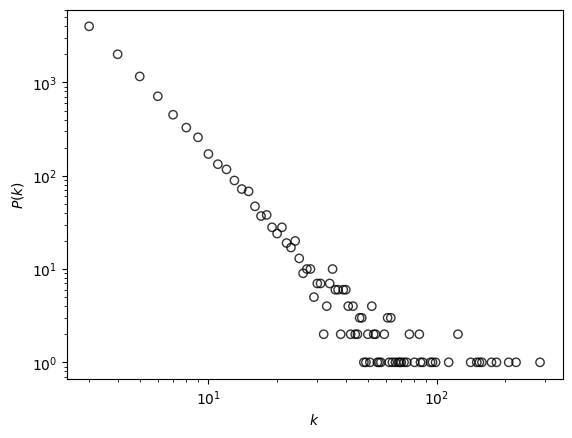

In [18]:
ks = np.array([len(list(nx.neighbors(G, n))) for n in G])

degs, counts = np.unique(ks, return_counts=True)
plt.scatter(degs, counts, color='none', edgecolors='black', alpha=0.8)

plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.xscale('log')
plt.yscale('log')